In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import sys

plt.style.use(['science','no-latex'])

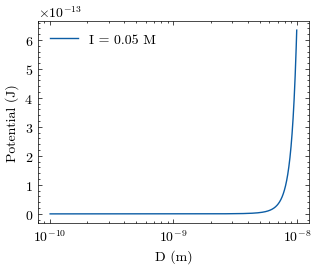

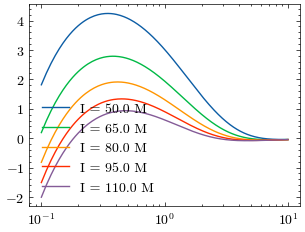

In [10]:
def DLVO_potential(sigma, kappa, R, epsilon_0, epsilon_r, D, A, e):
    numerator = (2 * np.pi * (sigma**2) * R)
    denominator = ((kappa**2) * epsilon_0 * epsilon_r)
    # plt.plot(D, (numerator / denominator))
    # plt.show()
    # plt.plot(D, (numerator/denominator) * (e**(-kappa * D)))
    # plt.xscale("log")
    # plt.show()
    # plt.plot(D, (A*R)/(12*D))
    # plt.xscale("log")
    # plt.show()

    return ((numerator / denominator) * (e**(-kappa * D)) - (A*R)/(12*D))

def DLVO_approximation(D, I, e):
    return 2*( (183.4/I) * (np.exp(-0.104*np.sqrt(I)*D)) - 1/(4*D) )

k_b = 1.38e-23 # J K−1
NA = 6.022e23 # mol−1
epsilon_0 = 8.85e-12 #F m−1
epsilon_r = 80.1 # permittivity of water
e = 1.6e-19 #C
sigma = 0.03 #C m−2 for beta lactoglobulin
R = 2e-9 # m for beta lactoglobulin
T = 298 # K
A = 3 * k_b * T # Hamaker constant approximation
kappa_fn = lambda I: ( (epsilon_0*epsilon_r*k_b*T) / (2*NA*(e**2)*I) )**(-1/2)

D = np.linspace(.1e-9, 10e-9, 1000)
# D = np.linspace(.1, 10, 1000)

for i in np.linspace(50e-3, 110e-3, 1):
    plt.plot(
        D, 
        DLVO_potential(
            sigma=sigma, 
            kappa=kappa_fn(i), 
            R=R, 
            epsilon_0=epsilon_0, 
            epsilon_r=epsilon_r, 
            D= D, 
            A = A, 
            e = e
        ), 
        label=f"I = {i} M"
    )
plt.xscale("log")
plt.xlabel("D (m)")
plt.ylabel("Potential (J)")
plt.legend()
plt.show()

D = np.linspace(.1, 10, 1000)
for i in np.linspace(50, 110, 5):
    plt.plot(D, DLVO_approximation(D, i, e), label=f"I = {i} M")
plt.xscale("log")
plt.legend()
plt.show()

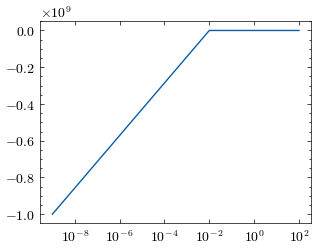

In [21]:
def f(x):
    return 2**(-x) - 1/x
X = np.linspace(1e-9, 100, 10000)
plt.plot(X, f(X))
plt.xscale("log")